In [1]:
import matplotlib.pyplot as plt
import numpy as np

font = {
    'family' : 'serif',
    'size'   : 15,
    'weight' : 'normal'
}
colors = ['r', 'm', 'darkorange', 'gold', 'darkkhaki', 'lightskyblue', 'y', 'blueviolet']
marker_colors = ['b', 'k', 'indigo', 'maroon', 'darkgreen', 'teal']

plt.rc('font', **font)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('axes', titlesize=22)
plt.rc('legend', fontsize=20)

# 3. Functional sequences

A functional sequence ${f_n(x)}$ is uniformly convergent to $f(x)$ on $E$ if $\lim\limits_{n\to\infty} r_n = 0$, where $r_n = \sup\limits_{x\in E}|f_n(x) - f(x)|$.

In this task $E$ is always a closed interval $[a,b]$, emulated by the uniform grid $a=x_0 < x_1 < \ldots < x_{m-1} < x_m = b$, and $r_n \approx \max\limits_k |f_n(x_k) - f(x_k)|$.

**(2 points) 3.1.** Complete the code for the class $\texttt{FunctionalSequence}$. Make sure your code produces the same pictures as listed below for the seminar examples.

**Caution!** Solutions using pythonic loops will receive at most **1 point**!

In [2]:
class FunctionalSequence:
    def __init__(self, term_implementation, name, limit_function=None):
        '''
            term_implementation: a vectorized function calculating the 2d array of terms
            name, string: labels in LaTeX
            limit_function: a vectorized function calctulating the limit of the sequence
        '''
        self.term_implementation = term_implementation
        self.limit_function = limit_function
        self.name = name
    
    def terms(self, ns, domain):
        '''
            ns : np.ndarray of indices
            domain : np.ndarray of points 
            Returns a numpy 2d-array [[f_n(x)]], n in ns, x in domain
        '''
        return self.term_implementation(ns, domain)
    
    def remainders(self, ns, domain):
        '''
            ns : np.ndarray of indices
            domain : np.ndarray of points 
            Returns a numpy 2d-array [[r_n(x) = |f_n(x) - f(x)|]], n in ns, x in domain
        '''
        assert self.limit_function is not None
        # YOUR CODE HERE
        f_n = self.terms(ns, domain)
        f = self.limit_function(domain)
        return np.absolute(f_n - f)
    
    def suprema(self, ns, domain):
        '''
            ns : np.ndarray of indices
            domain : np.ndarray of points
            Returns a numpy array [r_n = max|f_n(x) - f(x)|], n in ns
        '''
        # YOUR CODE HERE
        r_n = self.remainders(ns, domain)
        output = np.max(r_n, axis = 1) 
        return output
    
    def plot(self, mode, ns, domain, semilogy=False, y_lims=None):
        '''
            ns : np.ndarray of indices
            domain : np.ndarray of points
            Plots terms or remainders as functions of self.domain for n in ns
        '''
        plt.figure(figsize=(14, 7))

        #line_colors = np.random.choice(colors, size=len(ns), replace=False)
        # marker_edge_colors = np.random.choice(marker_colors, size=len(functions), replace=False)
        plot = plt.semilogy if semilogy else plt.plot
        
        if mode == 'terms':
            ys = self.terms(ns, domain).T
            plt.title(self.name)
        elif mode == 'remainders':
            ys = self.remainders(ns, domain).T
            plt.title("Remainders of " + self.name)
        plot(domain, ys, lw=3)
        
        label_list = [r'$n={}$'.format(i) for i in ns]
        if mode == 'terms' and not semilogy and self.limit_function is not None:
            plot(domain, self.limit_function(domain), lw=3, ls='--', c='r')
            label_list.append("limit")
            
        plt.grid(ls=':')
        plt.xlim(np.min(domain), np.max(domain))
        if y_lims is not None:
            if semilogy:
                plt.ylim(10 ** y_lims[0], 10 ** y_lims[1])
            else:
                plt.ylim(y_lims[0], y_lims[1])
        plt.legend(label_list);

In [3]:
def plot_sequences(sequences, labels, title, ns, semilogy=False, y_lims=None):
    '''
        Plots sequences on the same plot as functions of ns
    '''
    plt.figure(figsize=(14, 7))

    line_colors = np.random.choice(colors, size=len(sequences), replace=False)
    marker_edge_colors = np.random.choice(marker_colors, size=len(sequences), replace=False)
    plot = plt.semilogy if semilogy else plt.plot
    
    for i, sequence in enumerate(sequences):
        if len(ns) < 50:
            plot(ns, sequence, c=line_colors[i], lw=3,
                 markeredgecolor=marker_edge_colors[i], mew=2, marker='o', label=labels[i])
        else:
            plot(ns, sequence, c=line_colors[i], lw=3, label=labels[i])
    plt.grid(ls=':')
    plt.title(title)
    plt.xlim(np.min(ns), np.max(ns))
    if y_lims is not None:
        if semilogy:
            plt.ylim(10 ** y_lims[0], 10 ** y_lims[1])
        else:
            plt.ylim(y_lims[0], y_lims[1])
    plt.legend();

Consider the examples of $f_n(x) = x^n$, $g_n(x) = x^n - x^{n+1}$ and $h_n(x) = x^n - x^{2n}$
from the lecture/seminar on the segments $E_1 = [0, 0.8]$ and $E_2=[0.8, 1]$.

In [4]:
def geometric_terms(ns, domain):
    xs_grid, ns_grid = np.meshgrid(domain, ns)
    return xs_grid ** ns_grid

def geometric_diff_terms(ns, domain):
    return geometric_terms(ns, domain) * (1 - domain)

def geometric_double_diff_terms(ns, domain):
    return geometric_terms(ns, domain) * (1 - geometric_terms(ns, domain))

N_RANGE = np.arange(10, 101, 10)

Now plot the graphs of $f_n(x)$ and $g_n(x)$ for $n = 10, 20, \ldots, 100$.

**Remark.** All functions actually converge to identical zero (except for $f_n(1) = 1$), therefore, we do not plot the graphs of the remainders $r_n(x) = |f_n(x) - f(x)|$ here because $r_n(x) = f_n(x)$.

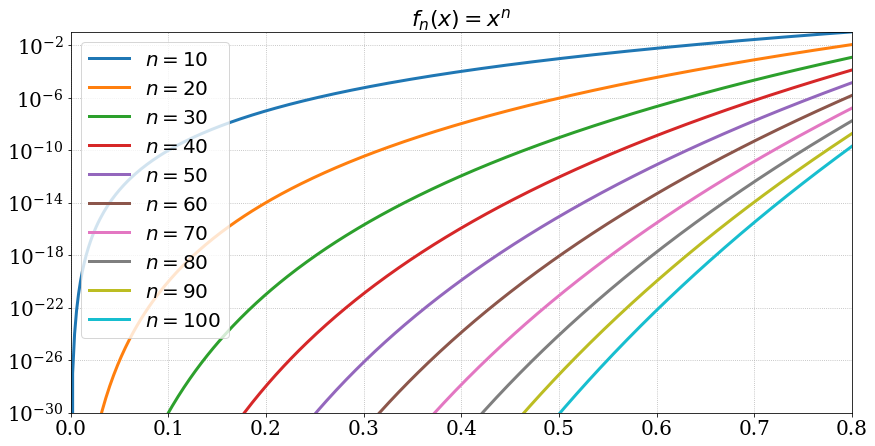

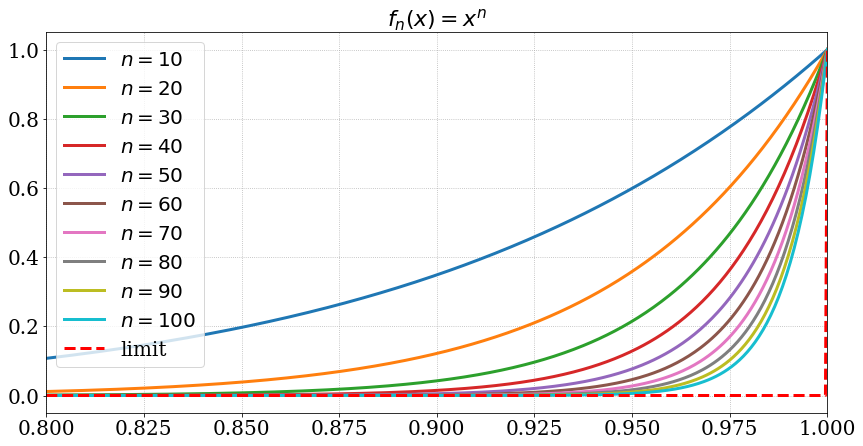

In [5]:
def powers_limit(domain):
    result = np.zeros_like(domain)
    if domain[-1] == 1:
        result[-1] = 1
    return result

right_domain = np.linspace(0.8, 1, 401)
left_domain = np.linspace(0, 0.8, 401)
x_powers = FunctionalSequence(lambda ns, domain : geometric_terms(ns, domain),
                              r'$f_n(x) = x^n$',
                              powers_limit)
x_powers.plot('terms', N_RANGE, left_domain, semilogy=True, y_lims=(-30, -1))
x_powers.plot('terms', N_RANGE, right_domain)

Note that we use the logarithmic scale on $E_1=[0, 0.8]$ since the terms vanish too fast in it.

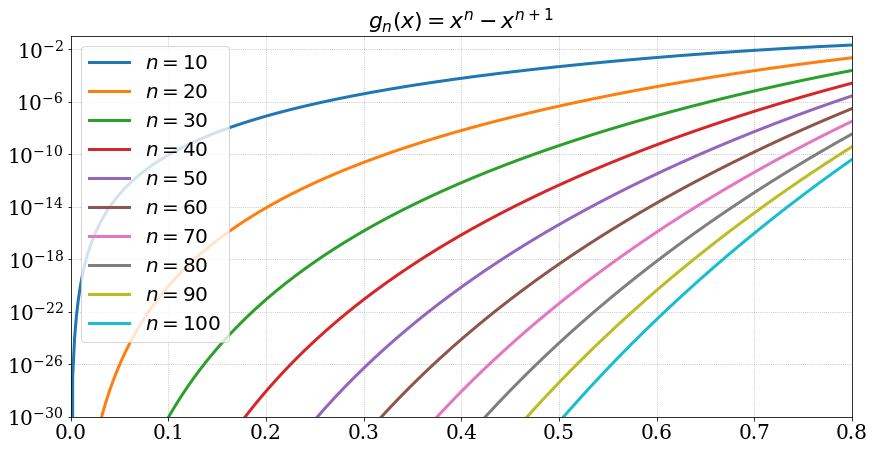

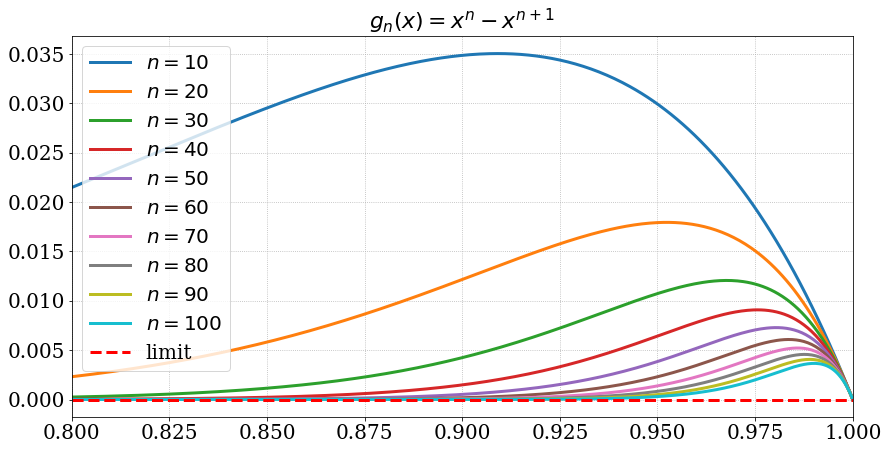

In [6]:
x_powers_diff = FunctionalSequence(geometric_diff_terms,
                                   r'$g_n(x) = x^n - x^{n+1}$',
                                   np.zeros_like)
x_powers_diff.plot('terms', N_RANGE, left_domain, semilogy=True, y_lims=(-30, -1))
x_powers_diff.plot('terms', N_RANGE, right_domain)

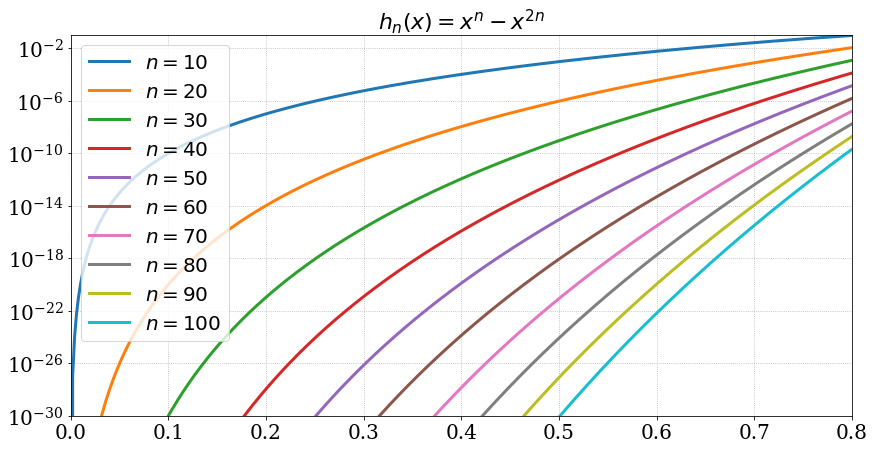

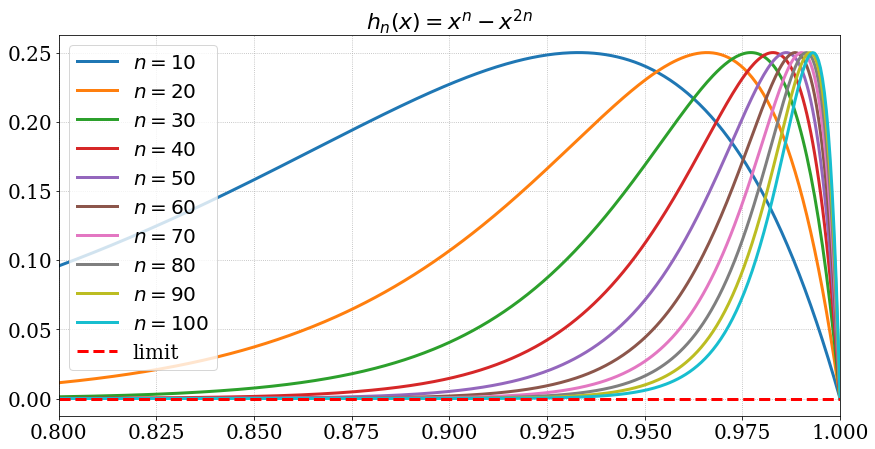

In [7]:
x_powers_double_diff = FunctionalSequence(geometric_double_diff_terms,
                                          r'$h_n(x) = x^n - x^{2n}$',
                                          np.zeros_like)
x_powers_double_diff.plot('terms', N_RANGE, left_domain, semilogy=True, y_lims=(-30, -1))
x_powers_double_diff.plot('terms', N_RANGE, right_domain)

From these pictures we can see that both $f_n \rightrightarrows 0$, $g_n \rightrightarrows 0$ and $h_n \rightrightarrows 0$ on $E_1=[0,0.8]$, $g_n \rightrightarrows 0$ on $E_2=[0.8, 1]$, whereas the sequences $f_n$ and $h_n$ are nonuniformly convergent in $E_2$ ($\lim\limits_{n\to\infty} r_n \ne 0$). To emphasize these effects, let's plot the graphs of $r_n$.

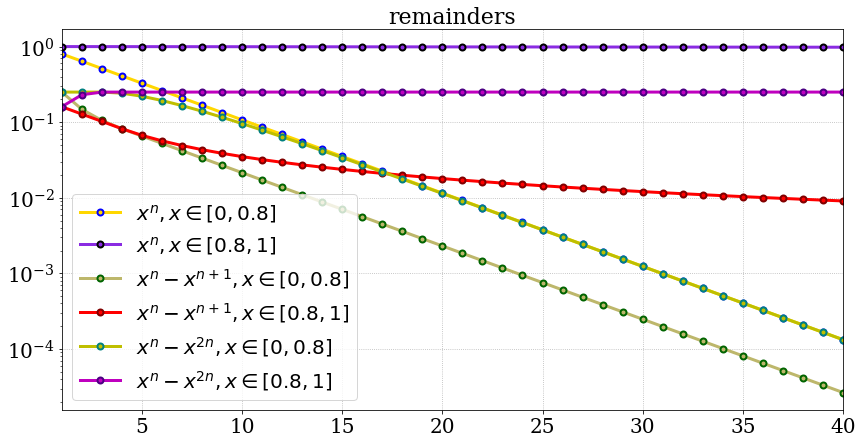

In [8]:
ns = np.arange(1, 41)
x_power_remainders_E1 = x_powers.suprema(ns, left_domain)
x_power_remainders_E2 = x_powers.suprema(ns, right_domain)
x_power_diff_remainders_E1 = x_powers_diff.suprema(ns, left_domain)
x_power_diff_remainders_E2 = x_powers_diff.suprema(ns, right_domain)
x_power_double_diff_remainders_E1 = x_powers_double_diff.suprema(ns, left_domain)
x_power_double_diff_remainders_E2 = x_powers_double_diff.suprema(ns, right_domain)
plot_sequences([x_power_remainders_E1, x_power_remainders_E2,
                x_power_diff_remainders_E1, x_power_diff_remainders_E2,
                x_power_double_diff_remainders_E1, x_power_double_diff_remainders_E2],
               [r"$x^n, x \in [0, 0.8]$", r"$x^n, x \in [0.8, 1]$",
                r"$x^{n} - x^{n+1}, x \in [0, 0.8]$", r"$x^{n} - x^{n+1}, x \in [0.8, 1]$",
                r"$x^{n} - x^{2n}, x \in [0, 0.8]$", r"$x^{n} - x^{2n}, x \in [0.8, 1]$"],
                'remainders', ns=ns, semilogy=True)

The remainders $r_n = \sup\limits_{x\in E_2} x^n$ and $r_n = \sup\limits_{x\in E_2} (x^n - x^{2n})$ clearly remain constant, while other 4 remainders tend to 0 as $n\to\infty$.

Consider the following functional sequences:
$$
f_n(x) = \Bigl(1 + \frac x{n^2}\Bigr)^{n^2}, x \in \mathbb R, \quad
g_n(x) = \cos(nx2^{-nx}), x\in[0, +\infty).
$$

**(1 points) 3.2.** Find the limit functions $f(x) = \lim\limits_{n\to\infty}f_n(x)$, $g(x) = \lim\limits_{n\to\infty}g_n(x)$ on the given intervals.

YOUR SOLUTION HERE

1)
$$
f_n(x) = \Bigl(1 + \frac x{n^2}\Bigr)^{n^2}, x \in \mathbb R, \quad \\
f(x) = \lim\limits_{n\to\infty} \big(1 + \frac{x}{n^2}\big)^{n^2} = \lim\limits_{n\to\infty} \big(1 + \frac{x}{n^2}\big)^{\frac{n^2}{x} \cdot \frac{x}{n^2} \cdot n^2} = \lim\limits_{n\to\infty} e^{n^2 \cdot \frac{x}{n^2}}= e^x \\ \\ \\
$$

2)
$$
g_n(x) = \cos(nx2^{-nx}), x\in[0, +\infty) \\
g(x) = \lim\limits_{n\to\infty} \cos(nx2^{-nx}) = \lim\limits_{n\to\infty} \cos(\frac{nx}{2^{nx}}) = |\text{as} \frac{1}{2^{nx}} \text{  decreases much faster}| = \cos{0} = 1 \\
$$

$$ $$

**(2 points) 3.3.** Complete the code for the sequences $f_n$ and $g_n$.

In [9]:
N_RANGE = np.arange(10, 101, 10)

def f_n_limit(domain):
    # YOUR CODE HERE
    output = np.full_like(domain, np.exp(domain))
    return output


def f_n_terms(ns, domain):
    # YOUR CODE HERE
    domain, ns = np.meshgrid(domain, ns)
    return np.power(1 + domain/ns/ns, ns*ns)


def g_n_limit(domain):    
    # YOUR CODE HERE
    output = np.full_like(domain, 1)
    return output


def g_n_terms(ns, domain):
    # YOUR CODE HERE
    domain, ns = np.meshgrid(domain, ns) 
    return np.cos(ns*domain*np.power(2,(-1)*ns*domain))


f_n = FunctionalSequence(f_n_terms,
                         r'$f_n(x) = (1 + \frac{x}{n^2})^{n^2}$',
                         f_n_limit)

g_n = FunctionalSequence(g_n_terms,
                         r'$f_n(x) = \cos(nx2^{-nx})$',
                         g_n_limit)

**(3 points) 3.4.** Plot the terms and the remainders (if necessary) on the same graph. Consider the following cases:

* $f_n(x)$, $x\in [-2, 0]$;
* $f_n(x)$, $x\in [1, 2]$;
* $g_n(x)$, $x\in [0, 0.5]$;
* $g_n(x)$, $x\in [0.5, 1]$.

Notes:

* Try to choose the most appropriate values (about 10 per graph) of $n$ for each case.
* Use the logarithmic scale **if and only if** needed.
* The parameter $\texttt{y}\_\texttt{lims}$ can also be useful.
* The quality of the graphs is essential!

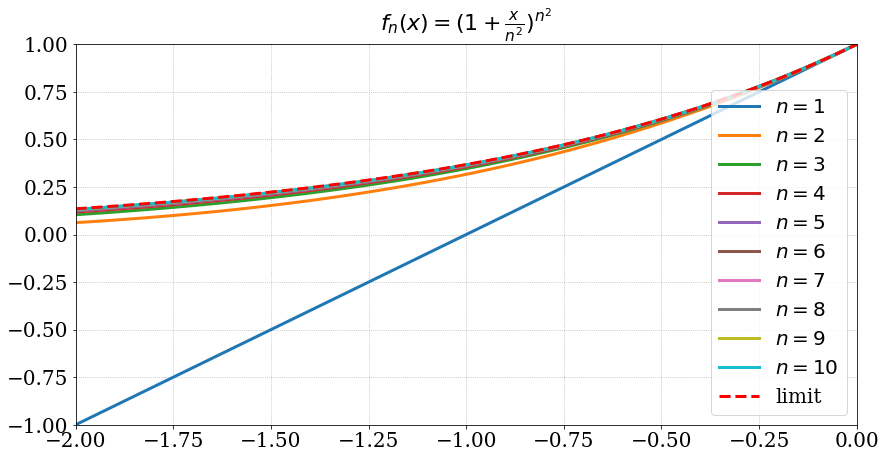

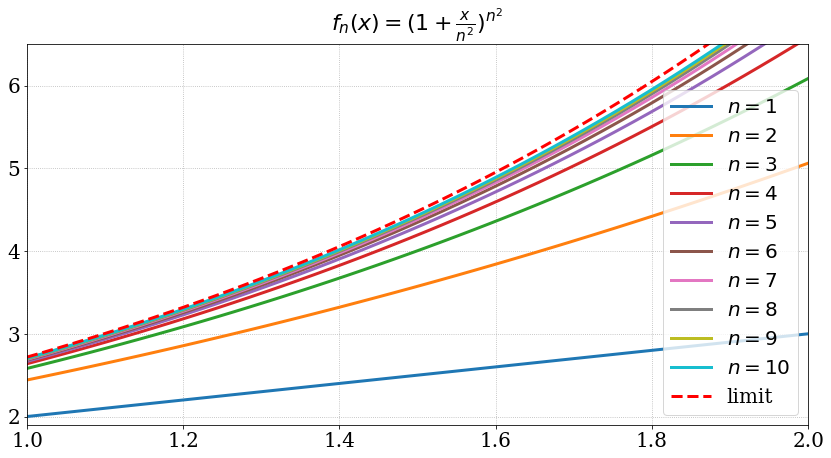

In [10]:
# YOUR CODE HERE
n_range = np.arange(1, 11, 1)

f_n.plot('terms', n_range, np.linspace(-2, 0, 50), semilogy = False, y_lims=(-1, 1))

f_n.plot('terms', n_range, np.linspace(1, 2, 50), semilogy = False, y_lims=(1.9, 6.5))


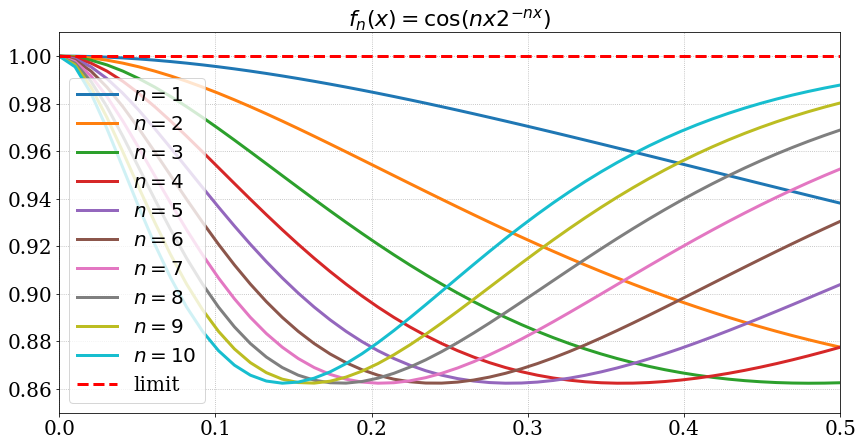

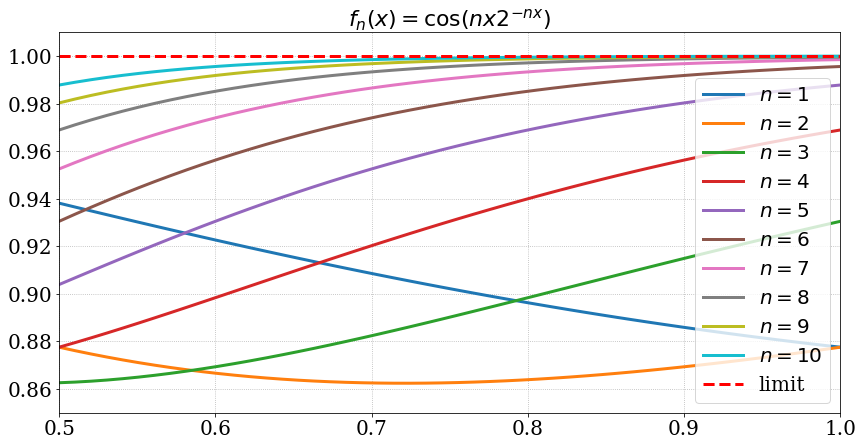

In [11]:
# YOUR CODE HERE
g_n.plot('terms', n_range, np.linspace(0, 0.5, 50), semilogy = False, y_lims=(0.85, 1.01))

g_n.plot('terms', n_range, np.linspace(0.5, 1, 50), semilogy = False, y_lims=(0.85, 1.01))

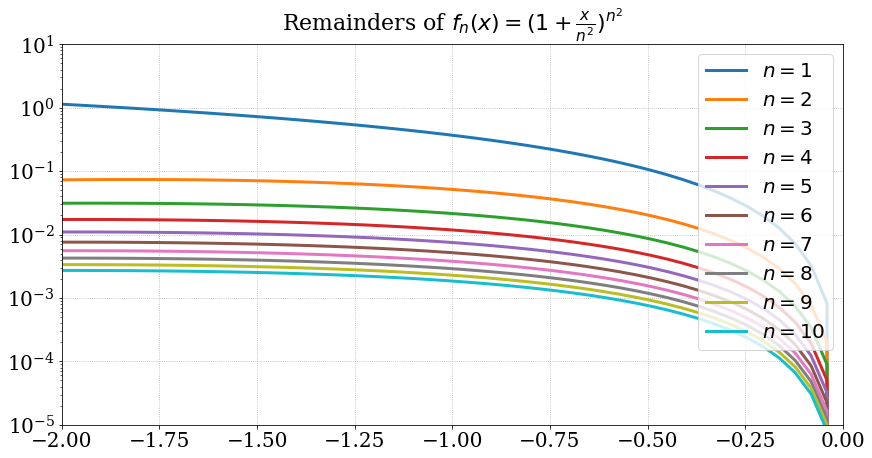

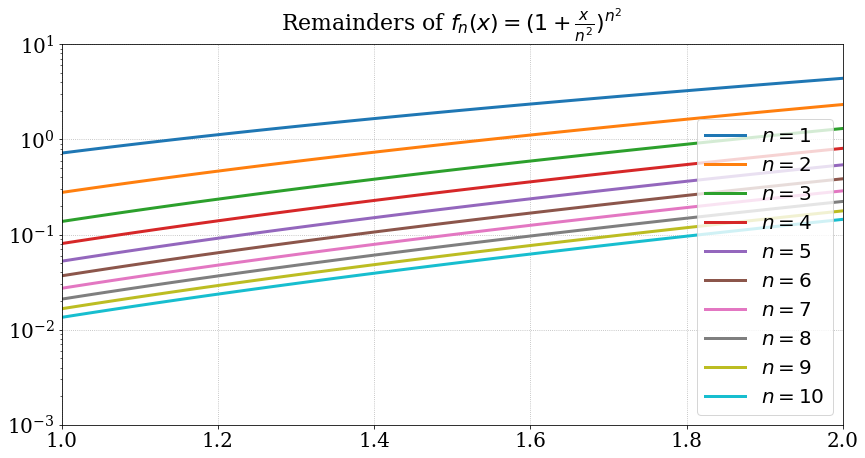

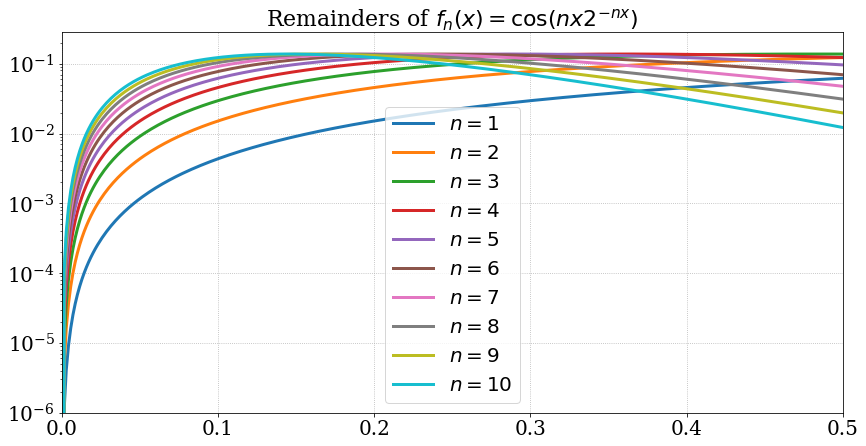

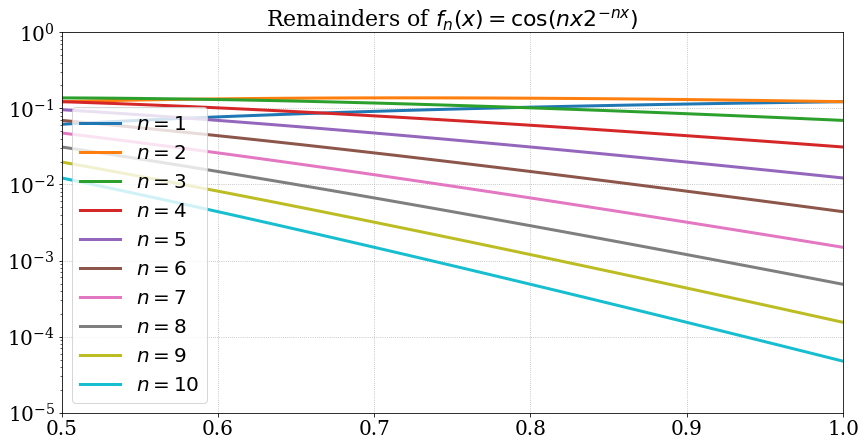

In [12]:
#remainders

f_n.plot('remainders', n_range, np.linspace(-2, 0, 50), semilogy = True, y_lims=(-5, 1))

f_n.plot('remainders', n_range, np.linspace(1, 2, 50), semilogy = True, y_lims=(-3, 1))

g_n.plot('remainders', n_range, np.linspace(0, 0.5, 350), semilogy = True, y_lims=(-6, -0.55))

g_n.plot('remainders', n_range, np.linspace(0.5, 1, 50), semilogy = True, y_lims=(-5, 0))


**(2 points) 3.5.** Plot the remainders $r_n = \sup\limits_{[a, b]} r_n(x)$, $n=1,2,\ldots, 40$, for all 4 cases from the previous point. Use the logarighmic scale if needed. Which of them seem to be tending to 0 (meaning the uniform convergence), and which do not?

Firsly, let us plot the remainders for all n from 1 to 40.

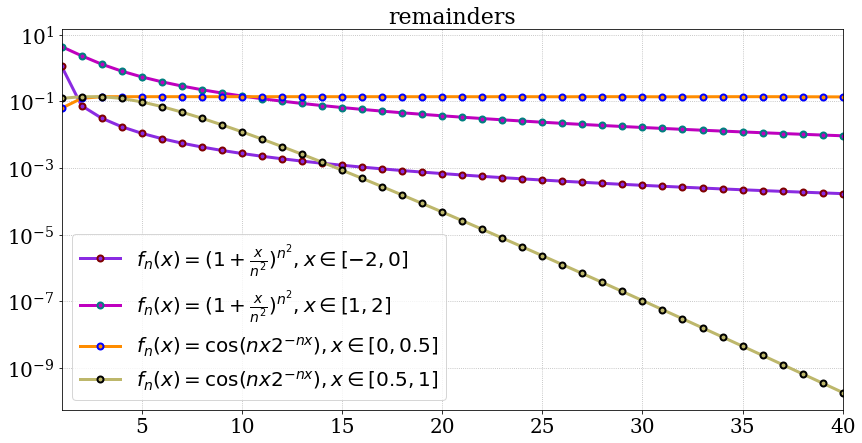

In [13]:

f_n_sup1 = f_n.suprema(np.arange(1, 41, 1), np.linspace(-2, 0, 50))
f_n_sup2 = f_n.suprema(np.arange(1, 41, 1), np.linspace(1, 2, 50))
g_n_sup1 = g_n.suprema(np.arange(1, 41, 1), np.linspace(0, 0.5, 50))
g_n_sup2 = g_n.suprema(np.arange(1, 41, 1), np.linspace(0.5, 1, 50))

plot_sequences([f_n_sup1,
                f_n_sup2,
                g_n_sup1,
                g_n_sup2],
               [ r'$f_n(x) = (1 + \frac{x}{n^2})^{n^2}, x\in [-2, 0]$',
                r'$f_n(x) = (1 + \frac{x}{n^2})^{n^2}, x\in [1, 2]$',
               r'$f_n(x) = \cos(nx2^{-nx}), x\in [0, 0.5]$',
                r'$f_n(x) = \cos(nx2^{-nx}), x\in [0.5, 1]$'],
                'remainders', ns=np.arange(1, 41, 1), semilogy=True)

ANSWER TO THE QUESTION$$$$
As the graphs show, the remainders of $\cos(nx2^{-nx})$ show different behavior on the segments $x\in [0, 0.5]$ and $x\in [0.5, 1]$. Remainders of $\cos(nx2^{-nx})$ tends to $0$ on the second segment, whereas on the first segment they do not (remain stable).

It can be easily seen that the remainders of $f_n(x) = \Bigl(1 + \frac x{n^2}\Bigr)^{n^2}$ tend to $0$ on both segments: $ x\in [-2, 0]$ and $x\in [1, 2]$.

# 4. Functional series

Given a functional series $\sum\limits_{n=1}^\infty u_n(x)$, which is pointwise convergent on a set $E$, denote

* the sum of the series as $S(x)$;

* the functional sequence of its partial sums as $\{S_n(x)\}$, $S_n(x) = \sum\limits_{k=1}^n u_k(x)$;

* the functional sequence of its remainders as $\{r_n(x)\}$, $r_n(x) = \sum\limits_{k=n+1}^{\infty} u_k(x)$.

The series $\sum\limits_{n=1}^\infty u_n(x)$ is uniformly convergent to $S(x)$ on $E$ if

$$
S_n(x) \rightrightarrows S(x) \text{ on } E \iff r_n(x) \rightrightarrows 0 \text{ on } E \iff
\lim\limits_{n\to\infty} \sup\limits_{x\in E}|r_n(x)| = 0.
$$


**(4 points) 4.1.** Complete the code for the class $\texttt{FunctionalSeries}$. Make sure your code produces the same pictures for the geometric series as listed below.

**Caution!** Solutions using pythonic loops will receive at most **2 points**!

In [14]:
class FunctionalSeries:
    def __init__(self, name, term_implementation, default_sum=np.zeros_like,
                 sum_implementation=None, sum_name=None, infty=None):
        '''
            name, string: label for the series in LaTeX
            term_implementation: a vectorized function calculating the array of terms
            default_sum, float: sum of initial terms (used if starting index is not 1)
            sum_estimation, float: approximate sum of the series (if known)
            sum_name, string: label for the sum of the series in LaTeX
            infty, int: a number large enough for a good estimation of the series sum
        '''
        self.name = name
        self.term_implementation = term_implementation
        self.default_sum = default_sum
        self.sum_implementation = sum_implementation
        self.sum_name = sum_name
        self.infty = infty
    
    def calculate_sum(self, begin, end, domain):
        '''
            Calculate the sum u_{begin}(x) + u_{begin + 1}(x) + ... + u_{end - 1}(x) for all x in domain
        '''
        # YOUR CODE HERE
        plus = np.zeros_like(domain)
        if self.default_sum is not None:
            plus = self.default_sum(domain)
        return np.sum(self.term_implementation(np.arange(begin, end), domain), axis=0) + plus
    
    def terms(self, ns, domain):
        '''
            Returns a numpy 2d-array [[a_n(x)]], n in ns, x in domain
        '''
        return self.term_implementation(ns, domain)
    
    def partial_sums(self, ns, domain):
        '''
            Returns a numpy array [[S_n(x)]], n in ns, x in domain
            where S_n is the partial sum of the series
        '''
        #YOUR CODE HERE
        plus = np.zeros_like(domain)
        if self.default_sum is not None:
            plus = self.default_sum(domain)  
        n = np.arange(1,ns[-1]+1)    
        term_impl = self.term_implementation(n, domain)
        output = np.cumsum(term_impl, axis=0) + plus
        return output[ns[0]-1:ns[-1]:(ns[1] - ns[0])]
            
    def remainders(self, ns, domain):
        '''
            Returns a numpy array [[|r_n(x)|]], n in ns, x in domain
            where r_n(x) = S(x) - S_n(x), S is an estimation of the sum of the series
        '''
        #YOUR CODE HERE
        if self.sum_implementation is None:
            output =  np.absolute(self.estimate_sum(domain) - self.partial_sums(ns, domain))
        else:
            s = self.sum_implementation(domain)
            s_n = self.partial_sums(ns, domain)
            output = np.absolute(s - s_n)
        return output
    
    
    def suprema(self, ns, domain):
        '''
            ns : np.ndarray of indices
            domain : np.ndarray of points
            Returns a numpy array [max|r_n(x)|], n in ns
        '''
        # YOUR CODE HERE
        r_n = self.remainders(ns, domain)
        Max = np.max(r_n, axis = 1) 
        return Max
    
    def estimate_sum(self, domain, n_min=1):
        '''
            Estimate the sum of the series as a big enough partial sum:
            u_{n_min}(x) + u_{n_min + 1}(x) + ... + u_{N_big}(x) for x in domain
        '''
        # YOUR CODE HERE
        n_max = self.infty
        output = self.calculate_sum(n_min, n_max, domain)
        return output
    
    
        
    def plot_sum(self, domain, semilogy=False, y_lims=None):
        plt.figure(figsize=(14, 7))
        plot = plt.semilogy if semilogy else plt.plot
        if self.sum_implementation is not None:
            plot(domain, self.sum_implementation(domain), lw=3, c='r')
        else:
            plot(domain, self.estimate_sum(domain), lw=3, c='r')
        plt.grid(ls=':')
        plt.title('Sum of the series ' + self.name)
        plt.xlim(np.min(domain), np.max(domain))
        if y_lims is not None:
            if semilogy:
                plt.ylim(10 ** y_lims[0], 10 ** y_lims[1])
            else:
                plt.ylim(y_lims[0], y_lims[1])
    
    def plot(self, mode, ns, domain, semilogy=False, y_lims=None):
        plt.figure(figsize=(14, 7))

        #line_colors = np.random.choice(colors, size=len(ns), replace=False)
        # marker_edge_colors = np.random.choice(marker_colors, size=len(functions), replace=False)
        plot = plt.semilogy if semilogy else plt.plot
        
        if mode == 'terms':
            ys = self.terms(ns, domain).T
        elif mode == 'partial sums':
            ys = self.partial_sums(ns, domain).T
        elif mode == 'remainders':
            ys = self.remainders(ns, domain).T
        plot(domain, ys, lw=3)
        
        label_list = [r'$n={}$'.format(i) for i in ns]
        if mode == 'partial sums':
            if self.sum_implementation is not None:
                plot(domain, self.sum_implementation(domain), lw=3, ls='--', c='r')
                label_list.append(r"$S(x)$" if self.sum_name is None else self.sum_name)
            else:
                plot(domain, self.estimate_sum(domain), lw=3, ls='--', c='r')
                label_list.append(r"$S(x)$" if self.sum_name is None else self.sum_name)
            
        plt.grid(ls=':')
        title = self.name
        if self.sum_name is not None:
            title += '=' + self.sum_name
        plt.title(title + ', ' + mode)
        plt.xlim(np.min(domain), np.max(domain))
        if y_lims is not None:
            if semilogy:
                plt.ylim(10 ** y_lims[0], 10 ** y_lims[1])
            else:
                plt.ylim(y_lims[0], y_lims[1])
        plt.legend(label_list);

Consider the geometric series: $\sum\limits_{n=0}^\infty x^n = \frac 1{1-x}$, $|x| < 1$. Here the set $E = (-1, 1)$ is an open interval, and we'll emulate it as $-1+\delta, -1 +2\delta, \ldots, 1 - 2\delta, 1 - \delta$ for some small $\delta > 0$.

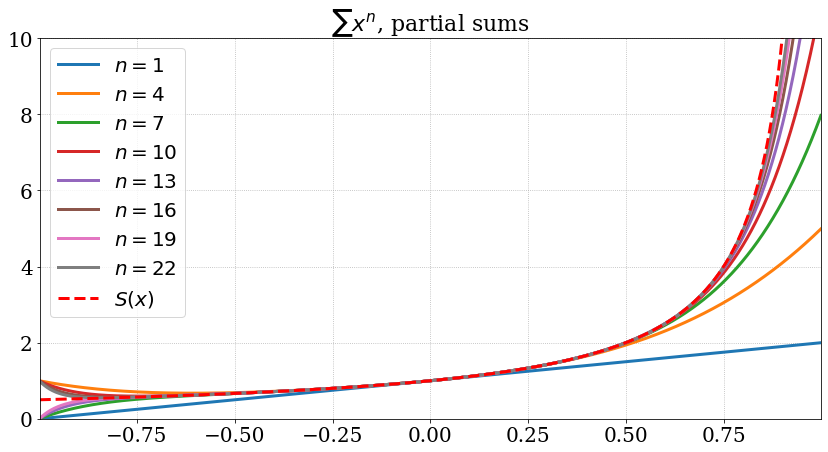

In [15]:
def geometric_terms(ns, domain):
    xs_grid, ns_grid = np.meshgrid(domain, ns)
    return xs_grid ** ns_grid

geometric_series = FunctionalSeries(r"$\sum{x^n}$", geometric_terms, 
                                    default_sum=np.ones_like,
                                    sum_implementation=lambda x: 1 / (1 - x))

EPS = 0.001
domain = np.linspace(-1 + EPS, 1 - EPS, int((2 - EPS) / EPS))

geometric_series.plot('partial sums', np.arange(1, 24, 3), domain, y_lims=(0, 10))

The partial sums do not fit well to the sum of the series $S(x) = \frac 1{1-x}$, when $x$ is close to $\pm 1$. More clearly this can be seen on the remainders plot:

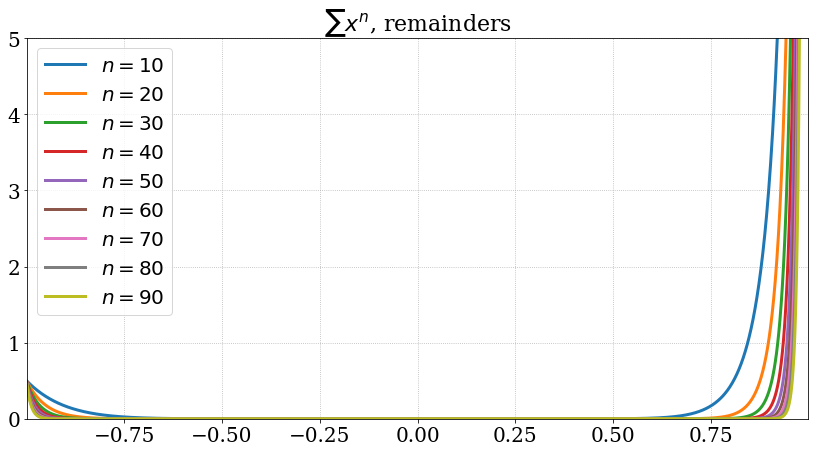

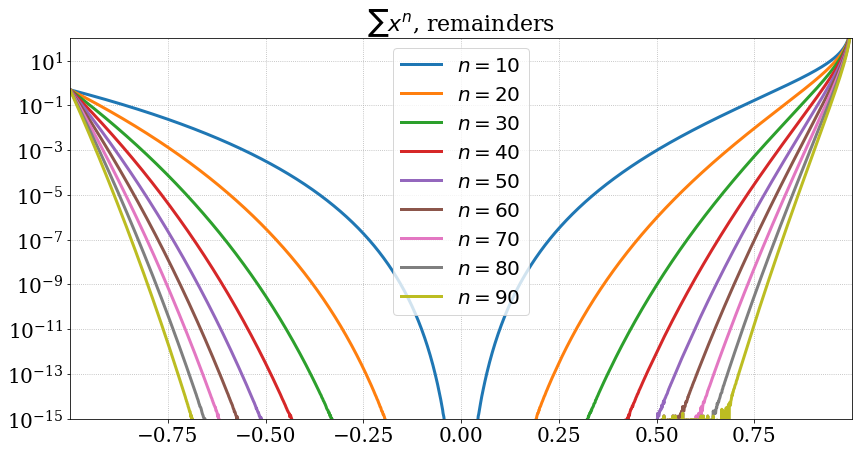

In [16]:
geometric_series.plot('remainders', np.arange(10, 100, 10), domain, y_lims=(0, 5))
geometric_series.plot('remainders', np.arange(10, 100, 10), domain, semilogy=True, y_lims=(-15, 2))

Let's study the behaviour at the boundary points in more details. Consider three intervals: $[-0.8, 0.8]$, $(-1, -0.9]$, $[0.9, 1)$.

In [17]:
N_RANGE = np.arange(10, 101, 10)
inner_domain = np.linspace(-0.8, 0.8, 401)
left_domain = np.linspace(-1, -0.9, 401)

# since the geometric series is divergent ant x = 1, the right endpoint is excluded
right_domain = np.linspace(0.9, 1, 400, endpoint=False)

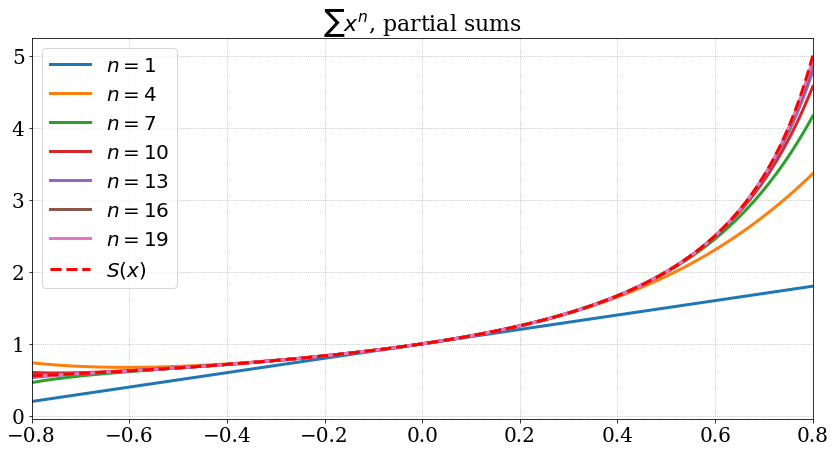

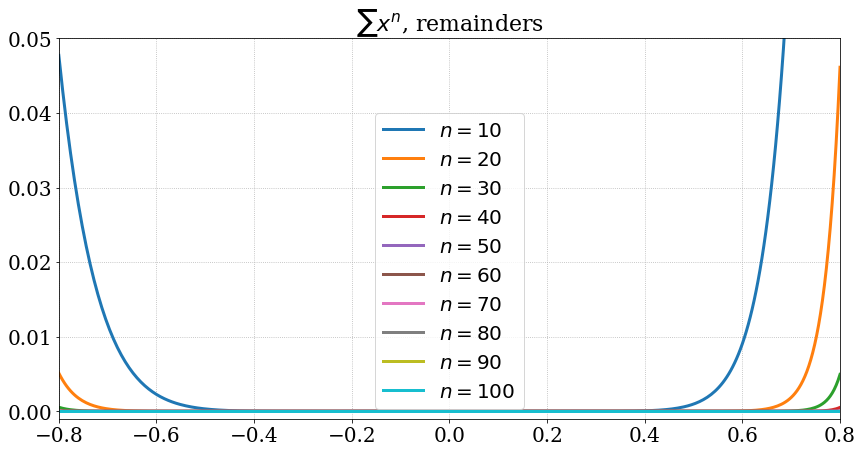

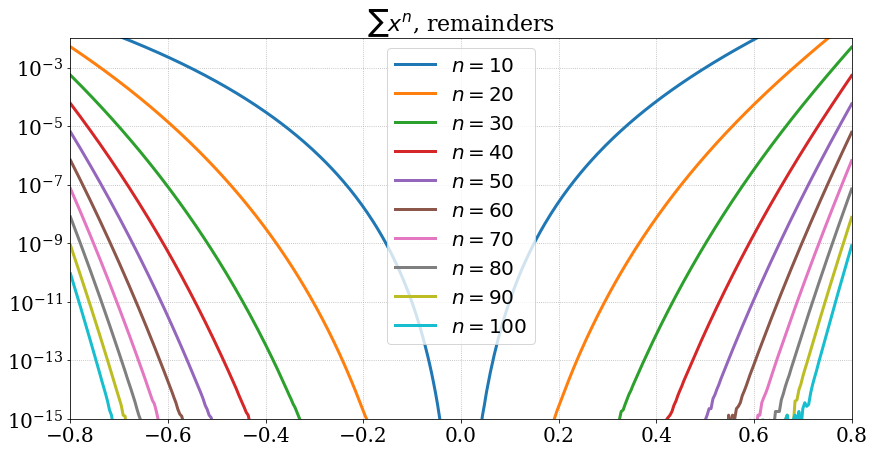

In [18]:
geometric_series.plot('partial sums', np.arange(1, 20, 3), inner_domain)
geometric_series.plot('remainders', N_RANGE, inner_domain, y_lims=(-0.001, 0.05))
geometric_series.plot('remainders', N_RANGE, inner_domain, semilogy=True, y_lims=(-15, -2))

While studying the behaviour of the remainders, the logarithmic scale is much more informative here, because in the usual scale several lines are completely hidden by the last one. We can see from the last plot, that the geometric series is uniformly convergent on $[-0.8, 0.8]$ (compare with the example from lecture 5, p. 18).

Now investigate what's happening at the boundary points:

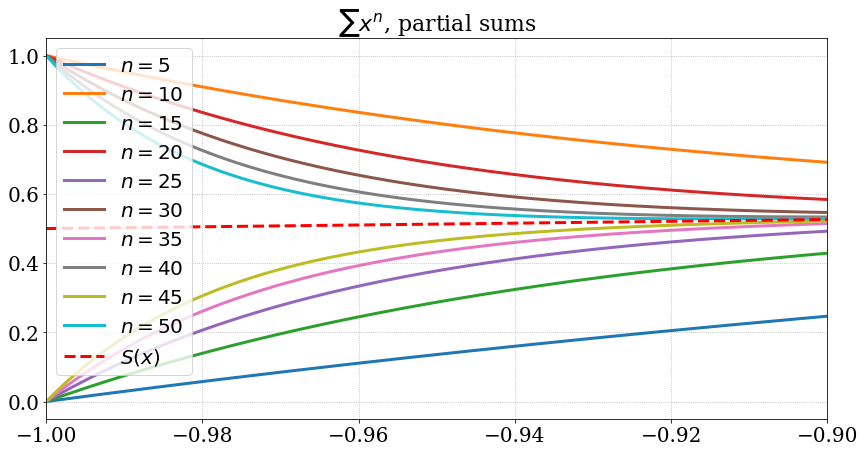

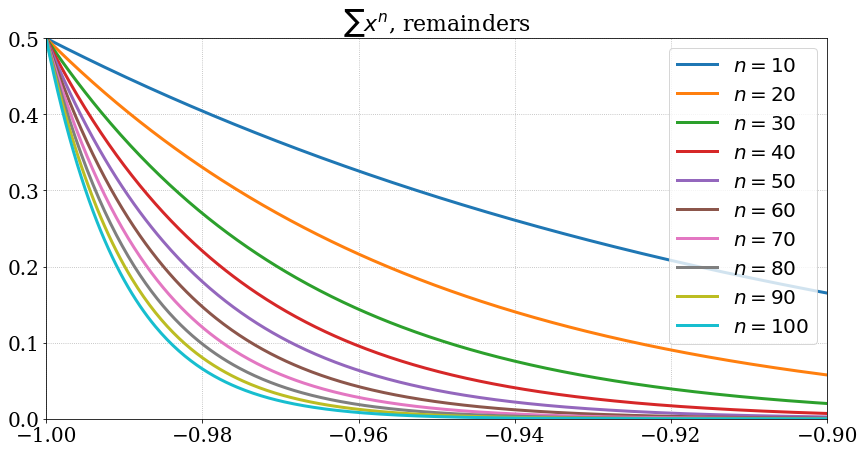

In [19]:
geometric_series.plot('partial sums', N_RANGE // 2, left_domain)
geometric_series.plot('remainders', N_RANGE, left_domain, y_lims=(0, 0.5))

Here we don't need the logarithmic scale; it's clear enough that $\sup\limits_{x\in(-1, -0.9]}|r_n(x)| = \frac 12$, therefore, the convergence of the series on $(-1, 0.9]$ is nonuniform.

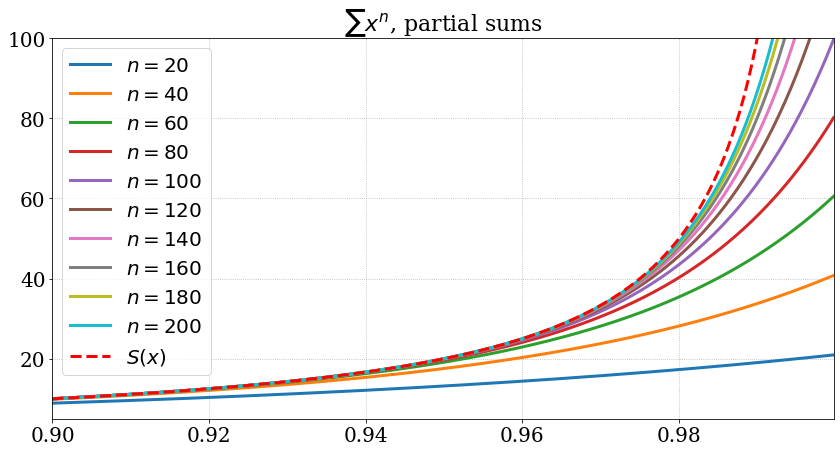

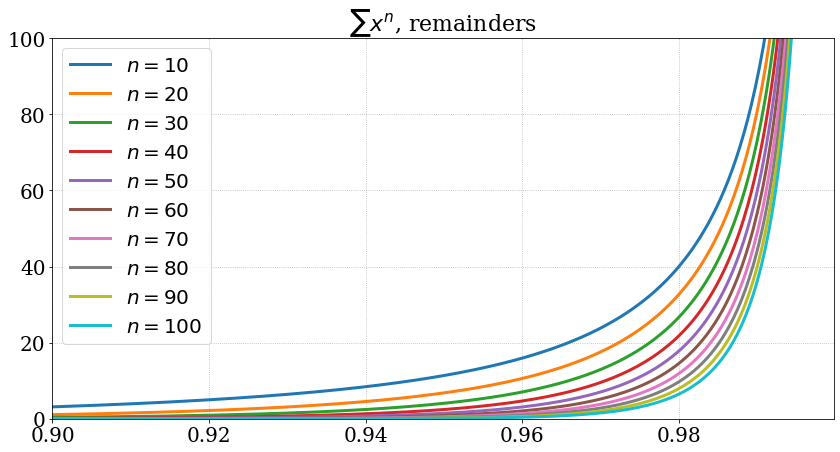

In [20]:
geometric_series.plot('partial sums', 2 * N_RANGE, right_domain, y_lims=(5, 100))
geometric_series.plot('remainders', N_RANGE, right_domain, y_lims=(0, 100))

Once again, there is no necessity in the logarithmic scale; the convergence of the series on $[0.9, 1)$ is nonuniform, since $\sup\limits_{x\in[0.9, 1)}|r_n(x)| = +\infty$.

Finally, plot the sequences $r_n = \sup\limits_{[a, b]}|r_n(x)|$:

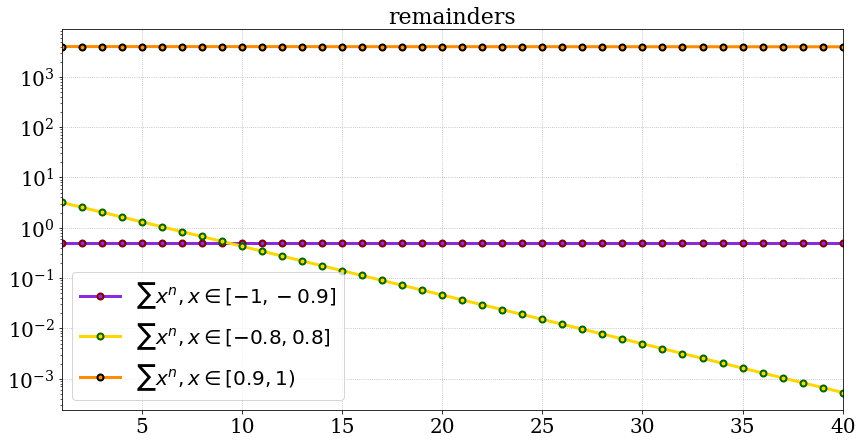

In [21]:
ns = np.arange(1, 41)
remainders_left = geometric_series.suprema(ns, left_domain)
remainders_inner = geometric_series.suprema(ns, inner_domain)
remainders_right = geometric_series.suprema(ns, right_domain)
plot_sequences([remainders_left, remainders_inner, remainders_right],
               [r"$\sum{x^n}, x\in[-1, -0.9]$", r"$\sum{x^n}, x\in[-0.8, 0.8]$", r"$\sum{x^n}, x\in[0.9, 1)$"],
               'remainders', ns=ns, semilogy=True)

It is clear from the plots that $r_n \to 0$ only for $[-0.8, 0.8]$, otherwise the sequence $r_n$ is not infinitesimal.

# 5. Properties of the sums of seires

Let $S(x) = \sum\limits_{n=1}^\infty \frac{\arctan nx}{n\sqrt n}$.

**(3 points) 5.1.** Show that the series converges everywhere and 

* the function $S(x)$ is odd, i.e., $S(-x) = -S(x)$;
* the function $S(x)$ has two horizontal asymptotes, i.e., $\lim\limits_{x\to\pm\infty} S(x) = \pm\frac{\pi}2 \zeta(1.5)$;
* $S \in C(\mathbb R)$;
* the function $S$ is increasing on $[0, +\infty)$.

*YOUR SOLUTION HERE*

Firstly, let us show that the given series converges everywhere:

Let $a_n = \frac{1}{n \sqrt{n}}$ and $ b_n = \arctan{nx}$

$\sum\limits_{n=1}^\infty a_n = \sum\limits_{n=1}^\infty \frac{1}{n \sqrt{n}} = \sum\limits_{n=1}^\infty \frac{1}{n^{3/2}}$ converges as this is $p$-series, $p = \frac{3}{2} >1 $

$b_n = \arctan{nx}$ is monotonic and bounded:                                  
By Abel test we can conlude that the series $\sum\limits_{n=1}^\infty \frac{\arctan nx}{n\sqrt n}$ converges for every $x$.

Before proceeding to the the items, uniform convergence should be proved (as it is needed later).   
Obviously, $\frac{\arctan nx}{n\sqrt n} < \frac{\pi}{2} \cdot \frac{1}{n \sqrt{n}}$ and $ \frac{\pi}{2} \cdot \sum\limits_{n=1}^\infty \frac{1}{n\sqrt n}$ converges (as $p$-series, $p = \frac{3}{2} >1 $). From Weierstrass M-test we can obtain that $\sum\limits_{n=1}^\infty \frac{\arctan nx}{n\sqrt n}$ converges uniformly.

* Since $\arctan $ is odd function, $S(-x) = \sum\limits_{n=1}^\infty \frac{\arctan -nx}{n\sqrt n} = \sum\limits_{n=1}^\infty -\frac{\arctan nx}{n\sqrt n} = -\sum\limits_{n=1}^\infty \frac{\arctan nx}{n\sqrt n} = -S(x)$
* Applying the fact that the series converge uniformly: $\lim\limits_{x\to\pm\infty} S(x) = \sum\limits_{n=1}^\infty \lim\limits_{x\to\pm\infty} \frac{\arctan nx}{n\sqrt n} = \begin{cases}
   \frac{\pi}{2}\cdot \sum\limits_{n=1}^\infty \frac{1}{n^{3/2}} \text{ if } x \to+\infty \\
   -\frac{\pi}{2}\cdot \sum\limits_{n=1}^\infty \frac{1}{n^{3/2}} \text{ if } x \to-\infty 
 \end{cases} =  $ | since $\zeta(x) = \sum\limits_{n=1}^\infty \frac{1}{n^{x}}$ | $ =$ $ =\pm\frac{\pi}2 \zeta(1.5)$
 
* To prove continuity of $S$, we are going to apply the following corollary: Function $S(x)$ is continuous on $I$
 
     if $u_n(x)$ is continuous on an open interval $I$ for all $ n \in \mathbb N$                                                          
     if $\sum\limits_{n=1}^\infty u_n(x)$ converges uniformly on $I$ to $S(x)$                                 
     $u_n(x) = \frac{\arctan nx}{n\sqrt n}$ is clearly continuous for all $x \in \mathbb R$. 
     Uniform convergence of $\sum\limits_{n=1}^\infty u_n(x) = \sum\limits_{n=1}^\infty \frac{\arctan nx}{n\sqrt n}$ we have proved ealier. 
     
  So, by the corollary, S is continous over real numbers.
* $S(x)$ is increasing fucntion as for bigger value of $x$ the value of the terms $\frac{\arctan nx}{n\sqrt n}$ becomes bigger.

**(2 points) 5.2.** Complete the code for the series in question. Plot the graphs of $S$ on the segments $[-1, 1]$, $[-3, 3]$, $[-10, 10]$. Do these graphs satisfy the properties from the previous problem? Looking at the graph, can you find any points at which $S'(x)$ does not exist?

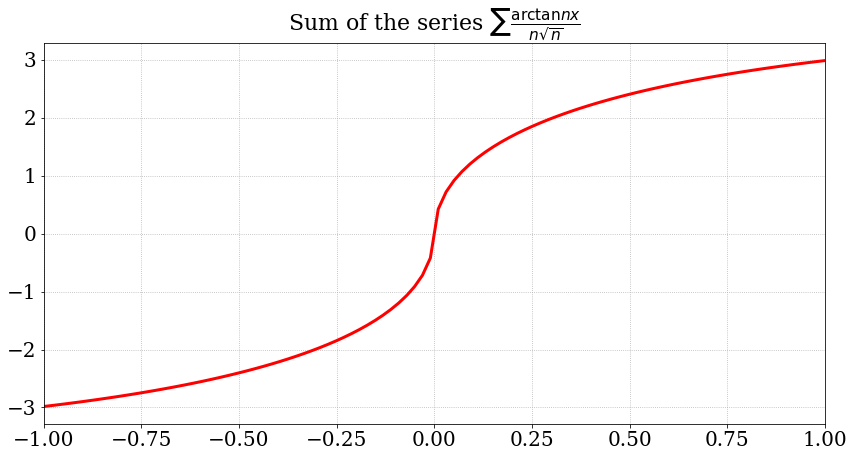

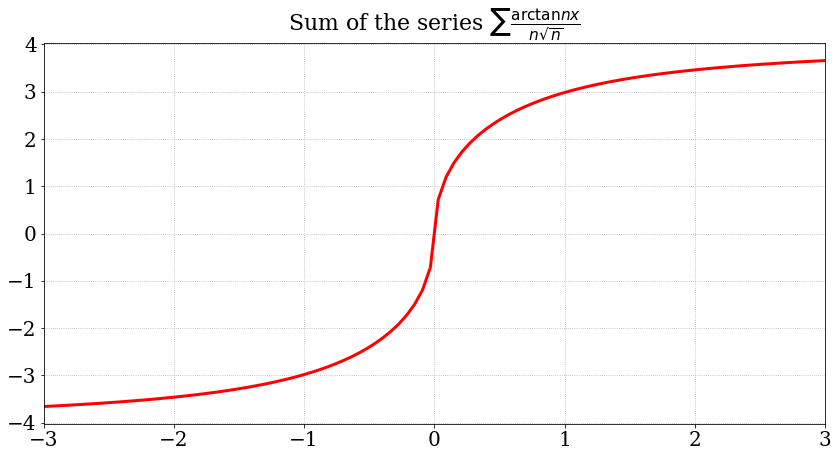

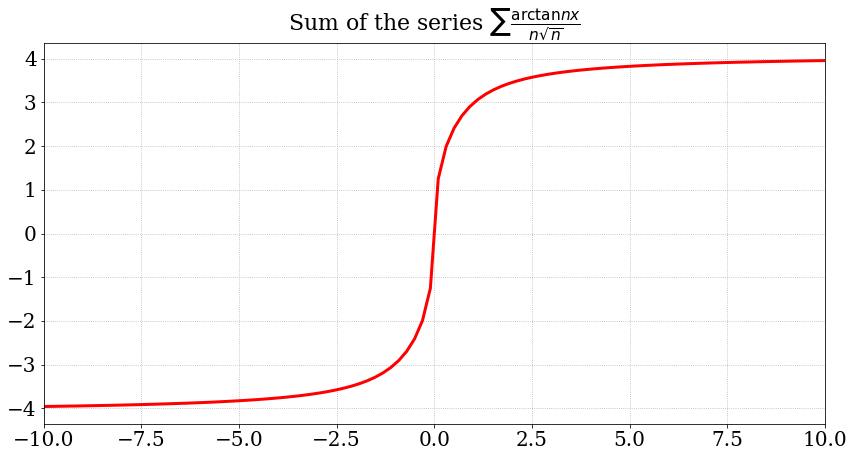

In [22]:
from scipy.special import zeta

def arctg_sqrt_terms(ns, domain):
    # YOUR CODE HERE
    domain, ns = np.meshgrid(domain, ns)
    return np.arctan(ns*domain)/(ns*np.sqrt(ns))

arctg_sqrt_series = FunctionalSeries(r"$\sum{\frac{\arctan nx}{n\sqrt{n}}}$", arctg_sqrt_terms, infty=10 ** 5)
# YOUR CODE HERE
arctg_sqrt_series.plot_sum(np.linspace(-1,1, 100))
arctg_sqrt_series.plot_sum(np.linspace(-3,3, 100))
arctg_sqrt_series.plot_sum(np.linspace(-10,10, 100))

ANSWER TO THE QUESTION $$$$

Indeed, the plots confirm the data obtained analytically (in item 5.1). We can see that it is odd, monotonically increasing and continuous over real numbers. $$$$
At the point (0,0) the tangent line is vertical. At point where the slope of the line is infinite, function is not differentiable. Thus $S'(X)$ does not exist at point (0,0).
There are no other points (points or discontinuity of breakpoints) where the derivative would not exist.

**(2 points) 5.3.** Plot the graphs of several partial sums and remainders on the segments $[-3, 3]$.

Notes:

* The partial sums should be distinguishable from the sum $S(x)$, but it should be clear from the graphs, that $\lim\limits_{n\to\infty} S_n(x) = S(x)$.
* From the remainders plot it should be clear that the series is uniformly convergent on each segment.
* The quality of the graphs is essential!

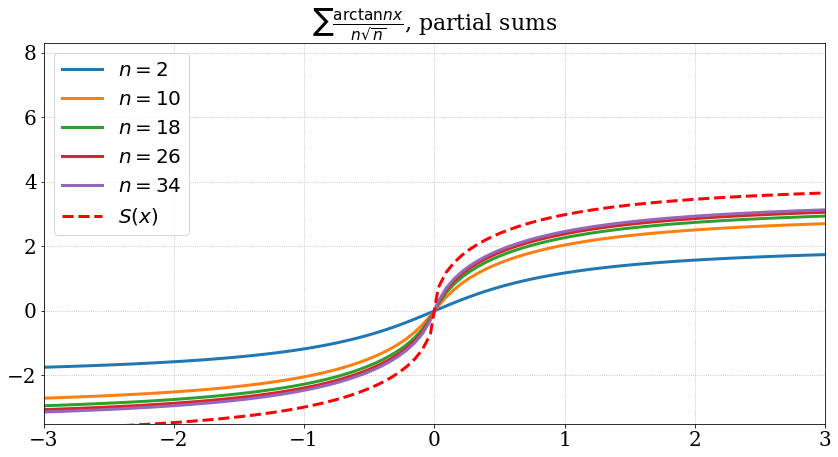

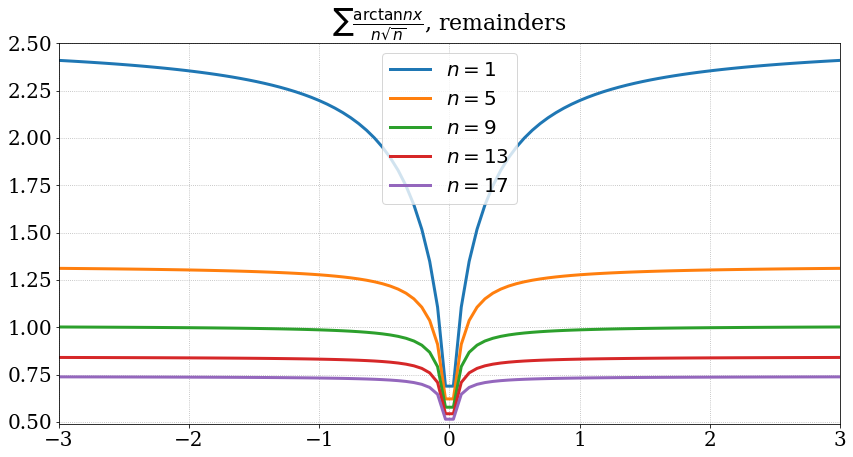

In [23]:
# YOUR CODE HERE
arctg_sqrt_series.plot('partial sums', 2*np.arange(1, 20, 4), np.linspace(-3,3, 100), y_lims=(-3.5, 8.3))
arctg_sqrt_series.plot('remainders', np.arange(1, 20, 4), np.linspace(-3,3, 100), y_lims=(0.49, 2.5))

**(1 point) 5.4.** Plot the graphs of the remainders $\sup\limits_{x\in[-3, 3]}|r_n(x)|$. Do they tend to zero as $n \to \infty$?

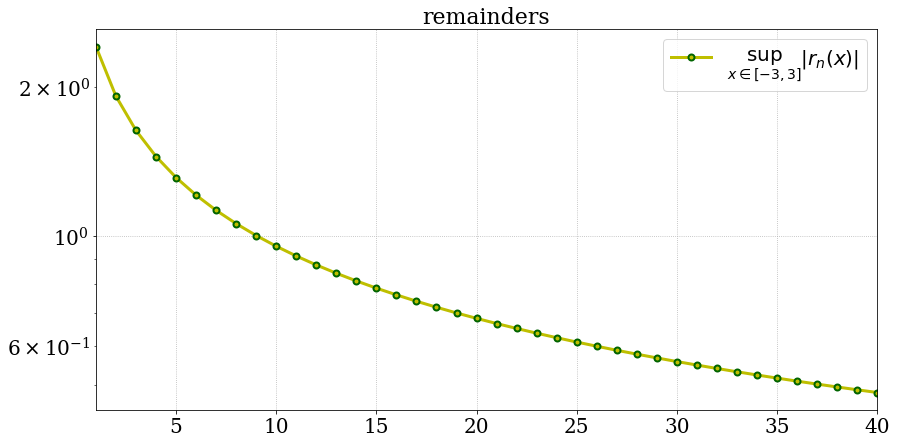

In [24]:
# YOUR CODE HERE
arctg_sqrt_series2 = arctg_sqrt_series.suprema(np.arange(1, 41, 1),np.linspace(-3,3, 300))
plot_sequences([arctg_sqrt_series2],
               [r"$\sup_{x\in[-3, 3]}|r_n(x)|$"],
                'remainders', ns=np.arange(1, 41, 1), semilogy=True)

ANSWER TO THE QUESTION

The plot shows that the remainders $\sup\limits_{x\in[-3, 3]}|r_n(x)|$ tend to $0$.

# 6. Taylor series

The Taylor series of a function $f\in C^{\infty}(x_0 - \varepsilon, x_0 + \varepsilon)$, $\varepsilon > 0$, at point $x_0$ is the power series
$$
f(x_0) + \frac{f'(x_0)}{1!}(x-x_0) + \frac{f''(x_0)}{2!}(x-x_0)^2 + \ldots  = \sum\limits_{n=0}^\infty \frac{f^{(n)}(x_0)}{n!}(x-x_0)^n.
$$

The Taylor series centered at $x_0=0$ is often called the Maclaurin series. For the function $f(x) = \cosh x$ we have
$$
\cosh x = 1 + \frac {x^2}{2} + \frac {x^4}{24} +\frac{x^6}{720} + \ldots = \sum\limits_{n=0}^\infty \frac{x^{2n}}{(2n)!}
$$

**(1 points) 6.1.** Show that this power series is uniformly convergent on every segment $[-a, a]$, $a > 0$.

*YOUR SOLUTION HERE* $$$$
Here, we are going to apply the Weierstrass M-test:
$|\frac{x^{2n}}{(2n)!}| \leq \frac{a^{2n}}{(2n)!} = M$.                                                   
$ \sum\limits_{n=0}^\infty \frac{a^{2n}}{(2n)!}$ converge by ratio test: $\lim\limits_{n\to\infty} \frac{M_{n+1}}{M_{n}} =\lim\limits_{n\to\infty} \frac{a^{2(n+1)}}{(2(n+1))!} \cdot \frac{(2n)!}{a^{2n}} = \lim\limits_{n\to\infty} \frac{a^2}{2n+2} = 0 < 1$ for every $a$.                                                                                            
Thus, the series $\sum\limits_{n=0}^\infty \frac{x^{2n}}{(2n)!}$ converge uniformly on every segment $[-a, a]$, $a > 0$.

**(3 points) 6.2.** Complete the code for the Maclaurin series in question. Plot the graphs of partial sums and remainders for the segments $[-1, 1]$, $[-5, 5]$, $[-10, 10]$. 

Notes:

* Try to choose the most appropriate values of $n$ for each segment.
* Use the logarithmic scale if needed.
* The quality of the graphs is essential!

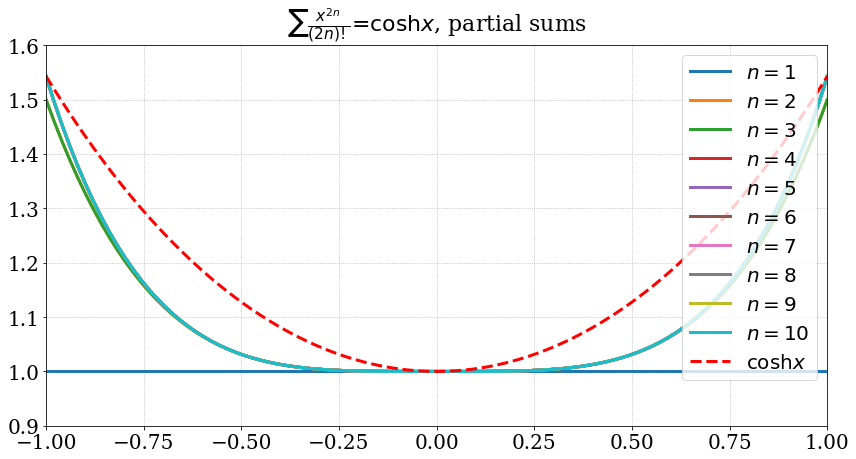

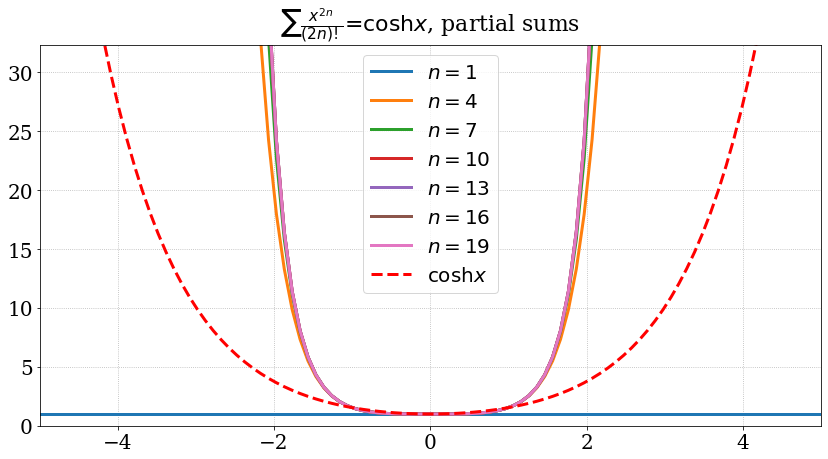

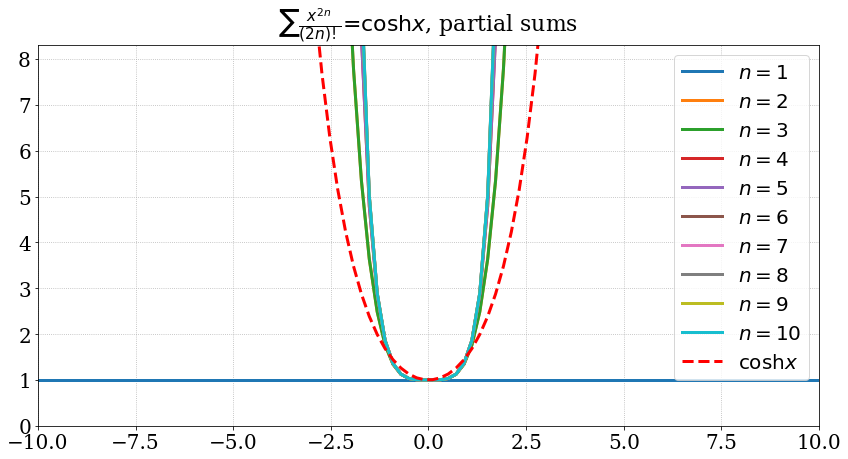

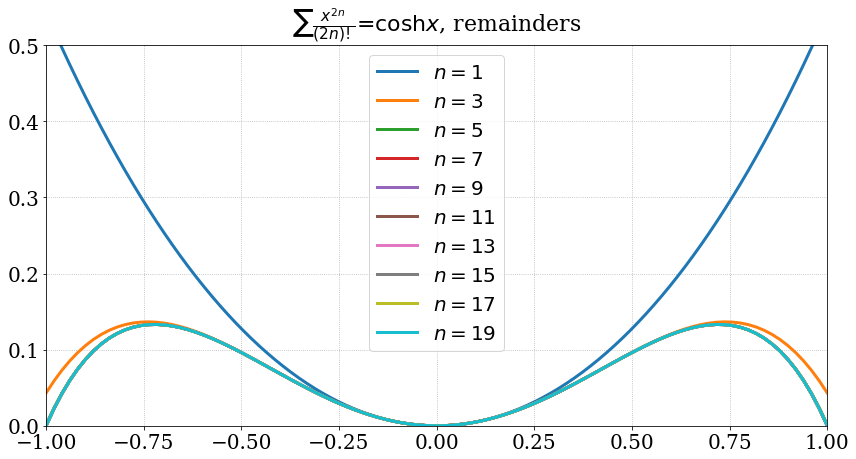

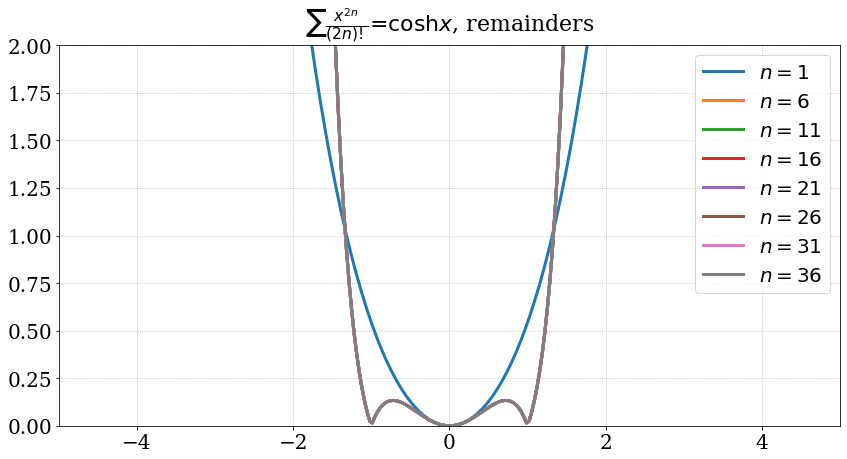

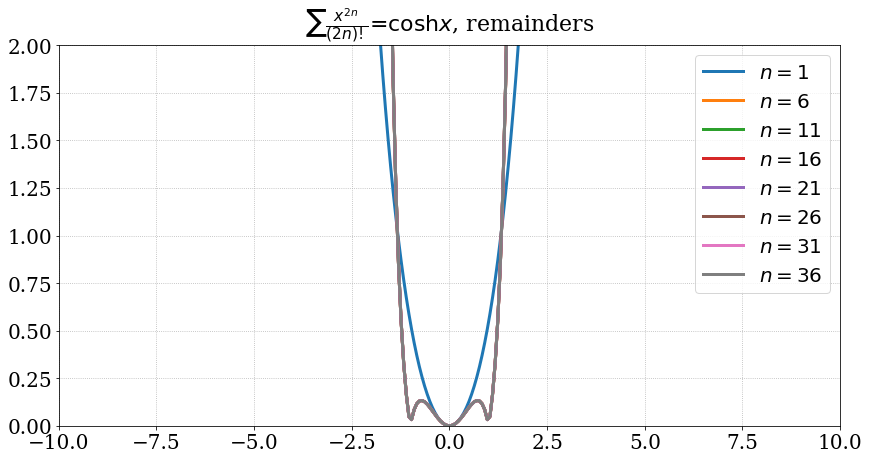

In [25]:
def alternate_cosh(ns):
    result = np.zeros_like(ns)
    result[ns % 2 == 0] = 1
    return result
from scipy.special import gamma, factorial

def cosh_terms(ns, domain):
    # YOUR CODE HERE
    domain, ns = np.meshgrid(domain, ns)
    return  alternate_cosh(ns)*np.power(domain,2*ns)/factorial(ns)

cosh_series = FunctionalSeries(r"$\sum{\frac{x^{2n}}{(2n)!}}$",
                               cosh_terms, 
                               default_sum=np.ones_like,
                               sum_implementation=np.cosh,
                               sum_name=r"$\cosh x$")

# YOUR CODE HERE
cosh_series.plot('partial sums', np.arange(1, 11, 1), np.linspace(-1,1, 100), y_lims=(0.9, 1.6))
cosh_series.plot('partial sums', np.arange(1, 21, 3), np.linspace(-5,5, 100), y_lims=(0, 32.3))
cosh_series.plot('partial sums', np.arange(1, 11, 1), np.linspace(-10,10, 100), y_lims=(0, 8.3))
cosh_series.plot('remainders', np.arange(1, 21, 2), np.linspace(-1,1, 100), y_lims=(0, 0.5))
cosh_series.plot('remainders', np.arange(1, 41, 5), np.linspace(-5,5, 300), y_lims=(0, 2))
cosh_series.plot('remainders', np.arange(1, 41, 5), np.linspace(-10,10, 300), y_lims=(0, 2))

**(1 points) 6.3.** Plot the graphs of the remainders $\sup\limits_{x\in[a,a]}|r_n(x)|$, $a =1, 5, 10$. Do they tend to zero as $n \to \infty$?

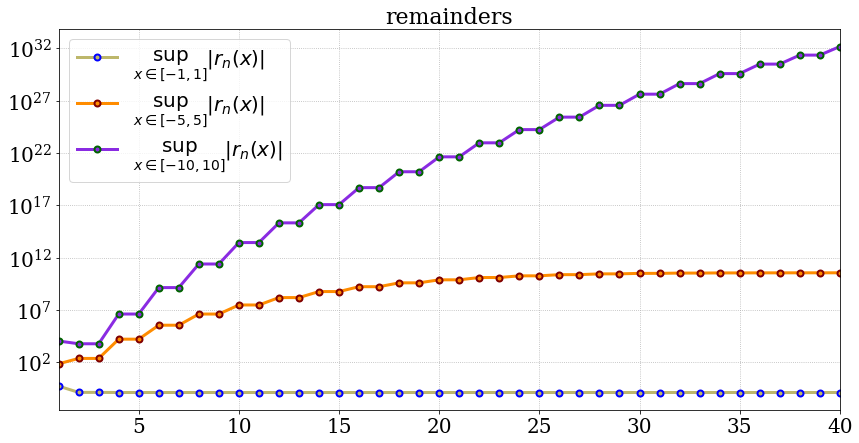

In [26]:
# YOUR CODE HERE
cosh_series_E1 = cosh_series.suprema(np.arange(1, 41, 1),np.linspace(-1,1, 500))
cosh_series_E2 = cosh_series.suprema(np.arange(1, 41, 1),np.linspace(-5,5, 500))
cosh_series_E3 = cosh_series.suprema(np.arange(1, 41, 1),np.linspace(-10,10, 500))
plot_sequences([cosh_series_E1,
                cosh_series_E2,
                cosh_series_E3],
               [r"$\sup_{x\in[-1,1]}|r_n(x)|$", r"$\sup_{x\in[-5,5]}|r_n(x)|$",
                r"$\sup_{x\in[-10,10]}|r_n(x)|$"],
                'remainders', ns=np.arange(1, 41, 1), semilogy=True)

ANSWER TO THE QUESTION

As the graph shows, only one of them seems tending to zero as $n \to \infty$.